In [12]:
import numpy as np
from scipy.linalg import eig
from scipy.optimize import minimize,rosen_der
import matplotlib.pyplot as plt
from numpy import array, exp
import time
import itertools

# Numerical Solver (Failed!)

In [ ]:
from scipy.optimize import fsolve

# Example
# Define the system of equations for the upper triangular part
def system(vars, ref_matrix):
    # Variables to solve for
    x, y, z, w ,a,b = vars
    # Construct the variable matrix (complex elements)
    variable_matrix = np.array([
        [x*y + 1j * a, z+1j*a],
        [w+2j*b, x*a - 1j * y]
    ])

    # Reference matrix (complex constants)
    reference_matrix = np.array(ref_matrix)

    # Extract the upper triangular parts (including the diagonal)
    upper_indices = np.triu_indices_from(variable_matrix)
    variable_vector = variable_matrix[upper_indices]
    reference_vector = reference_matrix[upper_indices]

    # Split into real and imaginary parts for real-valued equations
    real_equations = np.real(variable_vector - reference_vector)
    imag_equations = np.imag(variable_vector - reference_vector)

    # Combine real and imaginary parts into one system of equations
    return np.concatenate([real_equations, imag_equations])

# Example reference matrix (target)
reference_matrix = [
    [2 + 1j * 3, 4],
    [0, 2 - 1j * 3]  # Lower triangular part is ignored
]

# Initial guesses for variables
initial_guess = [1, 1, 1, 1,1,1]

# Solve the system for the upper triangle only
solution = fsolve(system, initial_guess, args=(reference_matrix))

# Output the solution
print("Solution for variables:")
print(f"x = {solution[0]}, y = {solution[1]}, z = {solution[2]}, w = {solution[3]}")


# Main problem
def system(vars,UPMNS,args):
    # Variables to solve for
    Yemu, Yeta, Ymuta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu = vars
    theta_emu, theta_eta, theta_muta = args

    # Construct the variable matrix (complex elements)
    M_nu_yuk = M_nu(Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu)
    
    UPMNS_matrix = np.array(UPMNS)
    # Extract the upper triangular parts (including the diagonal)
    upper_indices = np.triu_indices_from(M_nu_yuk)
    M_nu_yuk_vector = M_nu_yuk[upper_indices]
    UPMNS_matrix_vector = UPMNS_matrix[upper_indices]

    # Split into real and imaginary parts for real-valued equations
    real_equations = np.real(M_nu_yuk_vector) - np.real(UPMNS_matrix_vector)
    imag_equations = np.imag(M_nu_yuk_vector) - np.imag(UPMNS_matrix_vector)

    # Combine real and imaginary parts into one system of equations
    return np.concatenate([real_equations, imag_equations])
# Initial guesses for variables
initial_guess = [1e-2 for _ in range(12)]
UPMNS_matrix = Mnu_exp(0.03, 7.53*1e-5,2.455*1e-3,.307,2.19*1e-2,0.558,(1.19-0.22)*np.pi,0,0)
# Solve the system of equations
solution = fsolve(system, initial_guess, args = (UPMNS_matrix,[np.pi,np.pi,np.pi]) )
# Output the solution
print("Solution for variables:")
print(f"Yemu = {solution[0]}, Yeta = {solution[1]}, Ymuta = {solution[2]}")

Solution for variables:
x = 0.8454682792171445, y = 2.7295577090631937, z = 322.6457272233654, w = 5.0, a = 3.2284427359052166


# Symbolic Solver

In [13]:
from sympy import symbols, Eq, solve, Matrix, I, exp as expsym

# Step 1: Define the symbolic variables
x, y, z, w,a ,b, c,d = symbols('x y z w a b c d',real=True)

# Step 2: Define the complex matrix with variables
variable_matrix = Matrix([
    [x*a + I * y, z + I * c],
    [w*a - I * b*w, a - I * d]
])

# Step 3: Define the reference matrix with known values
reference_matrix = Matrix([
    [2 + 3 * I, 4],
    [5+ 3*I, 2 - 3 * I]
])

# Step 4: Flatten the matrices and set up equations
equations = []
for i in range(variable_matrix.rows):
    for j in range(variable_matrix.cols):
        eq = Eq(variable_matrix[i, j], reference_matrix[i, j])
        equations.append(eq)

# Step 5: Solve the equations for the variables
solution = solve(equations, (x, y, z, w, a ,b, c,d))

# Output the solution
print("Solution for variables:")
print(solution)
# print(solution[x],'or',solution.get(x, None))

Solution for variables:
[(1, 3, 4, 5/2, 2, -6/5, 0, 3)]


In [59]:
# Constants and matrices definitions
GZ_F = 1.1668 * 1e-5 # Fermi constant in GeV^-2 determined in Z decay
mH =  210 # 1000  # Mass of new charged doublet Higgs in GeV
mS =  200  # Mass of new charged singlet Higgs in GeV
me = 0.511 * 10**6  # Electron mass in eV
mmu = 106 * 10**6  # Muon mass in eV
mtau = 1777 * 10**6  # Tau mass in eV
c_beta =   0.9 # np.cos(np.arcsin(-2*(1e-6)*246/(mH^2-mS^2))/2) #    mixing angle between singlet and doublet
# theta_emu, theta_eta, theta_muta = [0 for _ in range(3)] # Phase of singlet couplings

# Define the variabe
Yemu, Yeta, Ymuta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu= symbols('Yemu Yeta Ymuta Mee Mmumu Mtata Memu Meta Mmuta Mmue Mtae Mtamu',real=True)

# Singlet Yukawa coupling
def YS(Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta):
    return Matrix([
        [0, Yemu*expsym(1j*theta_emu), Yeta*expsym(1j*theta_eta)],
        [-Yemu*expsym(1j*theta_emu), 0, Ymuta*expsym(1j*theta_muta)],
        [-Yeta*expsym(1j*theta_eta), -Ymuta*expsym(1j*theta_muta), 0]
    ])
# Doublet Yukawa coupling
def YH(Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu):
    return Matrix([
        [Mee, Memu, Meta],
        [Mmue, Mmumu, Mmuta],
        [Mtae, Mtamu, Mtata]
    ])

# Loop coefficient
def k(c_beta, mS,mH):
    return (2 * c_beta * np.sqrt(1 - c_beta**2)) / (16 * np.pi**2) * np.log((mS**2) / (mH**2))
# Lepton diagonal mass matrix
Ml = np.diag([me, mmu, mtau])
# # Neutrino mixing matrix
def M_nu(Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu):
    ys = YS(Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta)
    yh = YH(Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu)
    return k(c_beta, mS,mH)*(ys @ Ml @ yh.T + yh @ Ml @ ys.T)

In [41]:
def Mnu_exp(m1,deltaM21, deltaM32,s12,s13,s23,th_cp,alpha1,alpha2):
    return UPMNS(s12,s13,s23,th_cp,alpha1,alpha2)@NH_Mass(m1,deltaM21, deltaM32)@UPMNS(s12,s13,s23,th_cp,alpha1,alpha2).T

In [70]:
theta_emu_range = np.linspace(0.1*np.pi, np.pi/2, 5) #   
theta_eta_range = np.linspace(0.1*np.pi, np.pi/2, 5) #
theta_muta_range = np.linspace(0.1*np.pi, np.pi/2, 5) #
th_cp_range =  np.linspace((1.19-0.22*a)*np.pi, (1.19+0.22*a)*np.pi, 5)
alpha1_range = np.linspace(1.5*np.pi, 2*np.pi, 5) #   
alpha2_range = np.linspace(1.5*np.pi, 2*np.pi, 5) #  
for th_cp, alpha1, alpha2 in itertools.product(th_cp_range,alpha1_range,alpha2_range):
    for theta_emu, theta_eta, theta_muta in itertools.product(theta_emu_range, theta_eta_range, theta_muta_range):
        M_nu_yuk = M_nu(Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu)
        equations = []
        for i in range(M_nu_yuk.rows):
            for j in range(i,M_nu_yuk.cols): # run only the above diagonal elements
                # Create an equation that matches each element
                # print(M_nu_yuk[i, j])
                # print(Mnu_exp(0.03, 7.53*1e-5,2.455*1e-3,.307,2.19*1e-2,0.558,(1.19-0.22)*np.pi,0,0)[i,j])
                equations.append(Eq(M_nu_yuk[i, j], Mnu_exp(0.03, 7.53*1e-5,2.455*1e-3,.307,2.19*1e-2,0.558,th_cp,alpha1,alpha2)[i,j]))
                # print(equations)
        solution = solve(equations, (Yemu, Yeta, Ymuta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu))
        if len(solution) != 0:
            print(solution)

In [ ]:
M_nu_yuk = M_nu(Yemu, Yeta, Ymuta, 0,0,0,  Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu)
equations = []
for i in range(M_nu_yuk.rows):
    for j in range(i,M_nu_yuk.cols): # run only the above diagonal elements
        # Create an equation that matches each element
        equations.append(Eq(M_nu_yuk[i, j], Mnu_exp(0.03, 7.53*1e-5,2.455*1e-3,.307,2.19*1e-2,0.558,(1.19-0.22)*np.pi,0,0)[i,j]))
# Step 5: Solve the equations for the variables
solution = solve(equations, (Yemu, Yeta, Ymuta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu))
print(equations)

KeyboardInterrupt: 

In [ ]:
equations = []
n=2
while len(solution) ==0:
    x = 10**(-n)
    M_nu_yuk = M_nu(Yemu, Yeta, Ymuta, 0,0,0, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu)
    for i in range(M_nu_yuk.rows):
        for j in range(i,M_nu_yuk.cols): # run only the above diagonal elements
            # Create an equation that matches each element
            equations.append(Eq(M_nu_yuk[i, j], Mnu_exp(0.03, 7.53*1e-5,2.455*1e-3,.307,2.19*1e-2,0.558,(1.19-0.22)*np.pi,0,0)[i,j]))
    # Step 5: Solve the equations for the variables
    solution = solve(equations, (Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta))
    print("n:",n)
    n-=1
    if n == -13:
        break 
print(solution)

n: 2
n: 1
n: 0
n: -1
n: -2
n: -3
n: -4
n: -5
n: -6
n: -7
n: -8
n: -9
n: -10
n: -11
n: -12
[]


# Plot $M_{ee}$ from NO data

In [16]:
def arrange_in_decreasing_order(arr):
    # Enumerate the array to keep track of original positions
    enumerated_arr = list(enumerate(arr))

    # Sort the array in decreasing order based on the values
    sorted_arr = sorted(enumerated_arr, key=lambda x: x[1], reverse=True)

    # Extract the original positions after sorting
    original_positions = [index for index, _ in sorted_arr]

    # Extract the values in decreasing order
    sorted_values = [value for _, value in sorted_arr]

    return sorted_values, original_positions

# Example usage:
original_array = np.array([2, 5, 8])
sorted_values, original_positions = arrange_in_decreasing_order(original_array)

# print("Original Array:", original_array)
# print("Values in Decreasing Order:", sorted_values)
# print("Original Positions:", original_positions)

In [17]:
def NH_Mass(m1,deltaM21, deltaM32):
    return np.array([
        [m1, 0,0 ],
        [0,np.sqrt(m1**2+deltaM21),0],
        [0,0,np.sqrt(m1**2+deltaM21+deltaM32)]
    ])

In [18]:
def UPMNS(s12,s13,s23,th_cp,alpha1,alpha2):
    # alpha1 = np.pi
    # alpha2 = np.pi
    c13 = 1-s13
    c12 = 1-s12
    c23 = 1-s23
    rota_23 = np.array([
        [1, 0,0],
        [0,np.sqrt(c23),np.sqrt(s23)],
        [0,-np.sqrt(s23),np.sqrt(c23)]])
    rota_13 = np.array([
        [np.sqrt(c13), 0,np.sqrt(s13)*np.exp(-1j*th_cp)],
        [0,1,0],
        [-np.sqrt(s13)*np.exp(1j*th_cp),0,np.sqrt(c13)]])
    rota_12 = np.array([
        [np.sqrt(c12), np.sqrt(s12),0],
        [-np.sqrt(s12),np.sqrt(c12),0],
        [0,0,1]])
    majo_phase = np.array([
        [np.exp(1j*alpha1), 0,0],
        [0,np.exp(1j*alpha2),0],
        [0,0,1]])
    return rota_23@rota_13@rota_12@majo_phase

In [19]:
def Mee(m1,deltaM21, deltaM32,s12,s13,s23,th_cp,alpha1,alpha2):
    Mvu = UPMNS(s12,s13,s23,th_cp,alpha1,alpha2)@NH_Mass(m1,deltaM21, deltaM32)@UPMNS(s12,s13,s23,th_cp,alpha1,alpha2).T
    return abs(Mvu[0,0])

In [20]:
def Mee_check(m1,deltaM21, deltaM32,s12,s13,s23,th_cp,alpha1,alpha2): # check with the formula in PDG
    # alpha1 = np.pi
    # alpha2 = np.pi
    c13 = 1-s13
    c12 = 1-s12
    c23 = 1-s23
    return  abs(m1*c12*c13+np.sqrt(m1**2+deltaM21)*s12*c13*np.exp(2j*(alpha2-alpha1))+np.sqrt(m1**2+deltaM21+deltaM32)*s13*np.exp(-2j*(th_cp+alpha1)))

In [21]:
a = 1 # standard deviation
deltaM21_range = np.linspace((7.53-0.18*a)*1e-5, (7.53+0.18*a)*1e-5, 5)
deltaM32_range = np.linspace((2.455-0.028*a)*1e-3, (2.455+0.028*a)*1e-3, 5)
s12_range = np.linspace(0.307-0.012*a, 0.307+0.013*a, 5)
s23_range = np.linspace(0.558-0.021*a, 0.553+0.015*a, 5)
s13_range = np.linspace((2.19-0.07*a)*1e-2, (2.19+0.07*a)*1e-2, 5)
th_cp_range =  np.linspace((1.19-0.22*a)*np.pi, (1.19+0.22*a)*np.pi, 5) # np.linspace(0, 2*np.pi, 5) # [1.5*np.pi] #  
alpha1_range = [1*np.pi] #np.linspace(1.5*np.pi, 2*np.pi, 5) #   
alpha2_range = [1*np.pi] #np.linspace(1.5*np.pi, 2*np.pi, 5) #  

In [28]:
m1_range = np.linspace(0.0001,0.03,10)
m1_value1 = []
m_ee = []
for m1 in m1_range:
    for deltaM21, deltaM32,s12,s13,s23,th_cp,alpha1,alpha2 in itertools.product(deltaM21_range, deltaM32_range,s12_range,s13_range,s23_range,th_cp_range,alpha1_range,alpha2_range):
        m_ee.append(Mee_check(m1,deltaM21, deltaM32,s12,s13,s23,th_cp,alpha1,alpha2))
        m1_value1.append(m1)
    print(m1*10/(0.1-0.0001))

0.01001001001001001
0.3425647870092314
0.6751195640084529
1.0076743410076743
1.3402291180068957
1.6727838950061171
2.0053386720053386
2.3378934490045595
2.6704482260037814
3.003003003003003


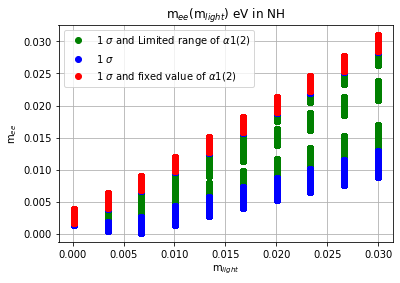

In [33]:
# Create the plot
plt.plot(m1_value, m_ee1, marker='o', color='g', linestyle='', label='1 $\\sigma$ and Limited range of $\\alpha1(2)$')
plt.plot(m1_value, m_ee2, marker='o', color='b', linestyle='', label='1 $\\sigma$')
plt.plot(m1_value1, m_ee, marker='o', color='r', linestyle='', label='1 $\\sigma$ and fixed value of $\\alpha1(2)$')
# Add labels and title
plt.xlabel('m${}_{light}$')
plt.ylabel('m${}_{ee}$')
plt.title('m${}_{ee}$(m${}_{light}$) eV in NH')
plt.legend()
plt.grid(True)

# Global fitting

In [8]:
# Constants and matrices definitions
GZ_F = 1.1668 * 1e-5 # Fermi constant in GeV^-2 determined in Z decay
mH =  210 # 1000  # Mass of new charged doublet Higgs in GeV
mS =  200  # Mass of new charged singlet Higgs in GeV
me = 0.511 * 10**6  # Electron mass in eV
mmu = 106 * 10**6  # Muon mass in eV
mtau = 1777 * 10**6  # Tau mass in eV
c_beta =   0.9 # np.cos(np.arcsin(-2*(1e-6)*246/(mH^2-mS^2))/2) #    mixing angle between singlet and doublet
theta_emu, theta_eta, theta_muta = [0 for _ in range(3)] # Phase of singlet couplings

# Singlet Yukawa coupling
def YS(Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta):
    return np.array([
        [0, Yemu*np.exp(1j*theta_emu), Yeta*np.exp(1j*theta_eta)],
        [-Yemu*np.exp(1j*theta_emu), 0, Ymuta*np.exp(1j*theta_muta)],
        [-Yeta*np.exp(1j*theta_eta), -Ymuta*np.exp(1j*theta_muta), 0]
    ])
# Doublet Yukawa coupling
def YH(Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu):
    return np.array([
        [Mee, Memu, Meta],
        [Mmue, Mmumu, Mmuta],
        [Mtae, Mtamu, Mtata]
    ])

# Loop coefficient
def k(c_beta, mS,mH):
    return (2 * c_beta * np.sqrt(1 - c_beta**2)) / (16 * np.pi**2) * np.log((mS**2) / (mH**2))
# Lepton diagonal mass matrix
Ml = np.diag([me, mmu, mtau])
# # Neutrino mixing matrix
# def M_nu(Yemu, Yeta, Ymuta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu):
#     ys = YS(Yemu, Yeta, Ymuta, theta_emu, theta_eta, theta_muta)
#     yh = YH(Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu)
#     return k(c_beta, mS,mH)*(ys @ Ml @ yh.T + yh @ Ml @ ys.T)
def M_nu(Mee,Mmumu, Mtata, Memu, Meta, Mmuta):
    # Mee = 0.01/k(c_beta, mS,mH)
    return k(c_beta, mS,mH)*np.array([
        [Mee, Memu, Meta],
        [Memu, Mmumu, Mmuta],
        [Meta, Mmuta, Mtata]
        ])
# # Diagonalizing mixing mass matrix function
# def Eigen(Yemu, Yeta, Ymuta,Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu):
#     m_nu = M_nu(Yemu, Yeta, Ymuta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu)
#     return eig(m_nu.conj().T @ m_nu)
def Eigen(Mee,Mmumu, Mtata, Memu, Meta, Mmuta):
    m_nu = M_nu(Mee,Mmumu, Mtata, Memu, Meta, Mmuta)
    return eig(m_nu.conj().T @ m_nu)
# Extract squared mass eigen
def EiValue(eigen):
    sorted_values, original_positions = arrange_in_decreasing_order(eigen[0].real)
    return sorted_values
# Extract eigenvector
def EiVectors(eigen):
    sorted_values, original_positions = arrange_in_decreasing_order(eigen[0].real)
    return eigen[1][:,original_positions]

# The NH rearranging matrix
NHTransposematrix = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
# The IH rearranging matrix
IHTransposematrix = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])

# U_PMNS in NH
def NHUPMNS(eigen):
    return np.dot(EiVectors(eigen), NHTransposematrix)
# delta m^2_12 function
def NHDeltaM12(eigen):
    return EiValue(eigen)[1] - EiValue(eigen)[2]
# delta m^2 function
def NHDeltaM(eigen):
    return EiValue(eigen)[0] - 0.5 * (EiValue(eigen)[2] + EiValue(eigen)[1])

# U_PMNS in IH
def IHUPMNS(eigen):
    return np.dot(EiVectors(eigen), IHTransposematrix)
# delta m^2_12 function
def IHDeltaM12(eigen):
    return EiValue(eigen)[0] - EiValue(eigen)[1]
# delta m^2 function
def IHDeltaM(eigen):
    return EiValue(eigen)[2] - 0.5 * (EiValue(eigen)[0] + EiValue(eigen)[1])

# Oscillation functions (in squared unit)
def c12(U11, U13):
    return abs(U11)**2 / (1 - abs(U13)**2)

def s12(U11, U13):
    return 1 - c12(U11, U13)

def c23(U13, U33):
    return abs(U33)**2 / (1 - abs(U13)**2)

def s23(U13, U33):
    return 1 - c23(U13, U33)

def s13(U13):
    return abs(U13)**2

def c13(U13):
    return 1 - s13(U13)

# Note: This translation assumes that `Eigen` function's output will be compatible with subsequent functions. 
# You may need to adjust the output format of `Eigen` to match the expected input format of other functions.

In [5]:
# The global fit function
def Global_fit_function(array,coupling=0):
    # for i in range(len(Couling_value)):
    #     if i == coupling:
    #         Couling_value[i] = array[0]
    M  = Eigen(*array)
    # U_PMNS in NH
    UPMNS = NHUPMNS(M)
    # Exp. value in NH
    # Mass constraints
    deltaM12_ex = 7.37*1e-05 # eV^2
    deltaM12_1dev = (7.97-6.93)*1/3*1e-05
    deltaM_ex = 2.5*1e-03 # eV^2
    deltaM_1dev = (2.63-2.37)*1/3*1e-03
    # Mixing angle constraints in squared unit
    s12_ex = 0.297
    s12_1dev = (0.354-0.25)*1/3
    s13_ex = 0.0214
    s13_1dev = (0.0246-0.0186)*1/3
    s23_ex = 0.437
    s23_1dev = (0.616-0.379)*1/3
    # Xi^2 
    Ftarget = ((NHDeltaM12(M) - deltaM12_ex)/(2*deltaM12_1dev))**2 + ((NHDeltaM(M) - deltaM_ex)/(2*deltaM_1dev))**2 + ((s12(UPMNS[0, 0], UPMNS[0, 2]) - s12_ex)/(2*s12_1dev))**2  + ((s23(UPMNS[0, 2], UPMNS[2, 2]) -s23_ex)/(2*s23_1dev))**2 + ((s13(UPMNS[0, 2]) -s13_ex)/(2*s13_1dev))**2 
    return Ftarget

In [83]:
def FiniteDiff_exact(parameters,coupling, epsilon=1e-14, l_rate=1e-29, ite=10000, tol=1e-3 ,pri = 1):
    Deriva = [[] for _ in range(len(parameters))]
    Upd_para = []
    vqe = []
    result = Global_fit_function(parameters,coupling=coupling)
    while 0.5 < Global_fit_function(parameters): # for _ in range(ite):#
        
        Dvqe = [0 for _ in range(len(parameters))]
        fix_parameters = list(parameters)  # Create a copy of parameters
        for i in range(len(parameters)):
            finite_diff = [0 for _ in range(len(parameters))]
            finite_diff[i] = epsilon

            Dvqe[i] = (1/(2*epsilon)*(Global_fit_function([fix_parameters[j] + finite_diff[j] for j in range(len(fix_parameters))],coupling) -
                                        Global_fit_function([fix_parameters[j] - finite_diff[j] for j in range(len(fix_parameters))],coupling)))
            # print(Global_fit_function([fix_parameters[j] + finite_diff[j] for j in range(len(fix_parameters))]))
            # print(Global_fit_function([fix_parameters[j] - finite_diff[j] for j in range(len(fix_parameters))]),'\n')
            parameters[i] -= l_rate * Dvqe[i]
            # Upd_para[i].append(parameters[i])
            # Deriva[i].append(Dvqe[i])
        if result < Global_fit_function(parameters,coupling=coupling):
            print('Loop break due to divergence')
            for i in range(len(parameters)):
                parameters[i] += l_rate * Dvqe[i]
            break
        elif result-Global_fit_function(parameters,coupling=coupling)<tol:
            print('Convergence too slow')
            for i in range(len(parameters)):
                parameters[i] += l_rate * Dvqe[i]
            break
        else:
            result = Global_fit_function(parameters,coupling=coupling)

        # print(np.dot(Dvqe,l_rate))
        if pri == 1:
            print(Global_fit_function(parameters,coupling=coupling))

    return result


Yemu, Yeta, Ymuta, Mee, Mmumu, Mtata, Memu, Meta, Mmuta, Mmue, Mtae, Mtamu

In [185]:
coupling = 1
initial_parameters = np.random.rand(12)*10**-4 # np.concatenate((np.random.rand(3)*10**-7,np.random.rand(9)*10**-2))# 
# random_array = np.random.uniform(low=-1, high=1, size=12)
# initial_parameters = list(np.dot(random_array[0:7],1e-8))+[random_array[7],random_array[8]]

In [7]:
# exclude_parameters = [initial_parameters[0],initial_parameters[1],initial_parameters[2]]
# initial_parameters = list(filter(lambda x: x not in exclude_parameters, initial_parameters))

In [34]:
re = FiniteDiff_exact(parameters=initial_parameters,coupling=coupling, epsilon= 1*1e-8, l_rate=1e-28, tol=1e-4, ite=1000, pri = 1)

Loop break due to divergence


In [59]:
a = result.fun
initial_parameters = result.x 
while a > 5:   
    
    result = minimize(Global_fit_function,initial_parameters, method='COBYLA', tol=1e-9, options={'disp': True, 'maxiter': 1000})
    initial_parameters = result.x 
    
    if abs(result.fun - a) < 1e-6 or (result.fun - a) > 100:
        # print('Break')
        break
    a = result.fun

In [89]:
Solution = []
i = 0

In [348]:
Number_data = 5800
xi2_value = 5
while i < Number_data:
    random_array = np.random.uniform(-2, 2, 6)
    initial_parameters = [np.random.uniform(0,10)*10**random_array[i] for i in range(6)]# np.concatenate((np.random.rand(1)*10**-3,np.random.rand(5)*10**-1)) # np.random.rand(6)*10**0 #       
    result = minimize(Global_fit_function,initial_parameters, method='COBYLA', tol=1e-9, options={'disp': True, 'maxiter': 1000})
    a = result.fun
    initial_parameters = result.x 
    while a > xi2_value:   
        
        result = minimize(Global_fit_function,initial_parameters, method='COBYLA', tol=1e-9, options={'disp': True, 'maxiter': 1000})
        initial_parameters = result.x 
        
        if abs(result.fun - a) < 1e-4 or (result.fun - a) > 100:
            # print('Break')
            break
        a = result.fun
    if a < xi2_value: 
        i+=1
        print(i)
        Solution.append(result.x)

5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341


In [24]:
def LFV_condition(array):
    # mu to 3e
    def muto3e(array):
        return array[3]**2*(array[6]**2+array[9]**2) < 2.9*1e-21*mH**4
    
    # tau to 3e
    def tauto3e(array):
        return array[3]**2*(array[7]**2+array[10]**2) < 4.47*1e-16*mH**4
    
    # tau to 3mu
    def tauto3mu(array):
        return array[4]**2*(array[8]**2+array[11]**2) < 3.48*1e-16*mH**4
    
    # tau to mu2e
    def tautomu2e(array):
        return (array[9]**2*array[7]**2+2*array[6]**2*array[7]**2+array[6]**2*array[10]**2+2*array[9]**2*array[10]**2) < 7.45*1e-16*mH**4
    
    # tau to e2mu
    def tautoe2mu(array):
        return (array[6]**2*array[8]**2+2*array[6]**2*array[11]**2+array[9]**2*array[11]**2+2*array[9]**2*array[8]**2) < 8.45*1e-16*mH**4
    
    # tau to 2mue
    def tauto2mue(array):
        return ((2*array[8]*array[9]-array[7]*array[4])**2+(2*array[11]*array[6]-array[10]*array[4])**2+4*array[6]**2*array[8]**2+4*array[11]**2*array[9]**2+7*array[7]**2*array[4]**2+7*array[10]**2*array[4]**2) < 2.69*1e-15*mH**4
    
    # tau to 2emu
    def tauto2emu(array):
        return ((2*array[7]*array[6]-array[8]*array[3])**2+(2*array[10]*array[9]-array[11]*array[3])**2+4*array[7]**2*array[9]**2+4*array[6]**2*array[10]**2+7*array[8]**2*array[3]**2+7*array[11]**2*array[3]**2) < 1.79*1e-15*mH**4
    
    return muto3e(array) and tauto3e(array) and tauto3mu(array) and tautomu2e(array) and tautoe2mu(array) and tauto2mue(array) and tauto2emu(array)

In [25]:
def Michel_condition(array):
    msinglet2 = (c_beta**2/(mS**2)+(1-c_beta**2)/(mH**2))**-1
    mdoublet2 = (c_beta**2/(mH**2)+(1-c_beta**2)/(mS**2))**-1
    Doublet_sum = 1/(16*mdoublet2**2)*sum(array[i]**2 * array[j]**2 for i in [4, 6, 11] for j in [3, 9, 10])
    a_1 = (1/mS**2-1/mH**2)**2*c_beta**2 * (1 - c_beta**2)/16*((-array[2]*array[3]-array[0]*array[10])**2+(array[2]*array[9])**2+(array[0]*array[9])**2) # a_(L=-2)
    a_2 = (1/mS**2-1/mH**2)**2*c_beta**2 * (1 - c_beta**2)/16*((-array[0]*array[11]+array[1]*array[4])**2+(array[1]*array[6])**2+(array[0]*array[6])**2)#  a_(L=2)
    c_1 = (1/mS**2-1/mH**2)**2*c_beta**2 * (1 - c_beta**2)/16*((-array[2]*array[3]+array[0]*array[10])**2+(array[2]*array[9])**2+(array[0]*array[9])**2+4*(array[0]*array[3])**2+4*(array[2]*array[10])**2) # c_(L=-2)
    c_2 = (1/mS**2-1/mH**2)**2*c_beta**2 * (1 - c_beta**2)/16*((-array[0]*array[11]-array[1]*array[4])**2+(array[1]*array[6])**2+(array[0]*array[6])**2+4*(array[0]*array[4])**2+4*(array[1]*array[11])**2) # c_(L=-2)
    a = a_1+a_2
    a_prime = a_1 - a_2
    b = (np.sqrt(2)*GZ_F+ array[0]**2/(4*msinglet2))**2 + 1/(16*msinglet2**2)*(sum(array[i]**2 * array[j]**2 for i in [0,2] for j in [0,1])-array[0]**2 * array[0]**2)+Doublet_sum
    b_prime = (np.sqrt(2)*GZ_F+ array[0]**2/(4*msinglet2))**2 + 1/(16*msinglet2**2)*(sum(array[i]**2 * array[j]**2 for i in [0,2] for j in [0,1])-array[0]**2 * array[0]**2)-Doublet_sum
    c = c_1 + c_2
    c_prime = c_2 - c_1  

    def de_rho(array):
        return -47 * 1e-5 < 3*(1/(mS**2)-1/(mH**2))**2/(a+4*b+6*c)*c_beta**2*(1-c_beta**2)/16*(sum(array[i] * array[j] * array[k] * array[l] for i,j,k,l in [[4,0,4,0],[11,0,4,1],[11,1,11,1]])
                                                                                        +sum(array[i] * array[j]*array[k] * array[l]for i,j,k,l in [[3,0,3,0],[10,2,10,2]])
                                                                                        -sum(array[i] * array[j]*array[k] * array[l]for i,j,k,l in [[10,0,3,2]])) < 5 * 1e-5

    def de_delta(array):
        return  1.3 * 1e-4 < 21*(1/(mS**2)-1/(mH**2))**2/(-3*a_prime+4*b_prime-14*c_prime)*c_beta**2*(1-c_beta**2)/16*(sum(array[i] * array[j] * array[k] * array[l] for i,j,k,l in [[4,0,4,0],[11,0,4,1],[11,1,11,1]])
                                                                                                                 -sum(array[i] * array[j]*array[k] * array[l]for i,j,k,l in [[3,0,3,0],[10,2,10,2]])
                                                                                                                 +sum(array[i] * array[j]*array[k] * array[l]for i,j,k,l in [[10,0,3,2]]))  < 8.1 * 1e-4
    
    def de_xi(array):
        return 2 * 1e-4 < (8*(1/(mS**2)-1/(mH**2))**2/(a+4*b+6*c)*c_beta**2*(1-c_beta**2)/16*sum(array[i]**2 * array[j]**2 for i,j in [[0,4],[0,4],[0,6],[0,11],[1,11],[1,11],[1,6],[1,4]])
                            + 8*(1/(mS**2)-1/(mH**2))**2/(a+4*b+6*c)*c_beta**2*(1-c_beta**2)**2/16*(3/2*sum(array[i] * array[j] * array[k] * array[l] for i,j,k,l in [[4,0,4,0],[11,0,4,1],[11,1,11,1]])
                                                                                                    -sum(array[i] * array[j]*array[k] * array[l]for i,j,k,l in [[3,0,3,0],[10,2,10,2]])
                                                                                                    +sum(array[i] * array[j]*array[k] * array[l]for i,j,k,l in [[10,0,3,2]])) 
                            +2*Doublet_sum/(a+4*b+6*c))  < 25 * 1e-4
    return  de_rho(array) and de_delta(array)  and de_xi(array)


Yemu 0, Yeta 1, Ymuta 2, Mee 3, Mmumu 4, Mtata 5, Memu 6, Meta 7, Mmuta 8, Mmue 9, Mtae 10, Mtamu 11

In [26]:
def filter_and_sort(arrays, condition):
    """
    Filters and sorts a list of 12-element arrays based on a given condition.

    Parameters:
        arrays (list): List of 12-element arrays to be filtered and sorted.
        condition (function): A function defining the condition for filtering.

    Returns:
        list: Filtered and sorted list of arrays.
    """
    satisfying_arrays = [array for array in arrays if condition(array)]
    return  satisfying_arrays # sorted(satisfying_arrays, key=lambda x: sum(x))  # Sorting by sum of elements

In [32]:
filtered_sorted_arrays_LFV = filter_and_sort(Solution, LFV_condition)
print("Filtered and sorted arrays:", len(filtered_sorted_arrays_LFV))

Filtered and sorted arrays: 0


In [31]:
filtered_sorted_arrays_Michel = filter_and_sort(Solution, Michel_condition)
print("Filtered and sorted arrays:", len(filtered_sorted_arrays_Michel))

Filtered and sorted arrays: 0


In [349]:
def save_arrays_to_text_file(arrays, filename):
    """
    Saves a list of arrays to a text file.

    Parameters:
        arrays (list): List of arrays to be saved.
        filename (str): Name of the file to save.
    """
    with open(filename, 'w') as file:
        for array in arrays:
            np.savetxt(file, array)
            file.write('\n')  # Separate arrays by a newline

# Example usage
filename = 'Coupling Data 2sigma gen_matrix c_beta 0.9 mHS 210 200 GeV.txt'
save_arrays_to_text_file(Solution, filename)


In [87]:
def read_arrays_from_text_file(filename):
    """
    Reads arrays from a text file where each array has 12 elements.

    Parameters:
        filename (str): Name of the file to read.

    Returns:
        list: List of arrays read from the file.
    """
    arrays = []
    with open(filename, 'r') as file:
        array_data = []
        for line in file:
            array_data.extend(map(float, line.strip().split()))
            if len(array_data) == 12:
                arrays.append(np.array(array_data))
                array_data = []
    return arrays

# Example usage
filename = 'Coupling Data gen_matrix c_beta 0.9 mHS 210 200 GeV fix gap.txt'
Solution = read_arrays_from_text_file(filename)
# # Transform tuple to list of arrays
# Solution = np.array([np_array.tolist() for np_array in Solution])

In [269]:
# Extract the first two elements for each array
first_two_elements = Solution[:, :2]
# Refine the plot data into specific range
Data = list(first_two_elements)
m = 0
for i in range(len(first_two_elements)):
    if abs(first_two_elements[i][0])> 1e-8 or  abs(first_two_elements[i][1])> 1e-8:
        Data = np.delete(Data, i-m, axis=0)
        m+=1

In [51]:
Data = np.concatenate((Data,Solution))

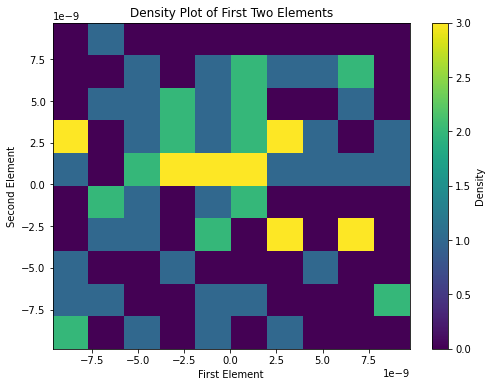

In [270]:
# Plot the density
plt.figure(figsize=(8, 6))
plt.hist2d(Data[:, 0], Data[:, 1], bins=10, cmap='viridis')

# Set log scale and value ranges for the axes
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(-1e-6, 1e-6)  # Set x-axis limit from 10^-3 to 1
# plt.ylim(-1e-6, 1e-6)  # Set y-axis limit from 10^-3 to 1

plt.colorbar(label='Density')
plt.xlabel('First Element')
plt.ylabel('Second Element')
plt.title('Density Plot of First Two Elements')
plt.show()